In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime
from esda.moran import Moran

from libpysal.weights.contiguity import Queen
import os
import splot
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import plot_moran
from splot.esda import plot_local_autocorrelation
from splot.esda import moran_scatterplot

/home/sara/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_8731/1177042910.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (c

In [8]:
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/old steps/reg_TA_PA_DL_new.csv")
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/csv/df_std_log_d_lag.csv")
states_gdf = gpd.read_file(r"/home/sara/Documenti/GitHub/Climate-and-conflict/Datasets/som_adm_ocha_itos_20230308_shp/som_admbnda_adm1_ocha_20230308.shp")
#dist = pd.read_csv(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\distance_df.csv")

## TA

p-value: 0.001
Moran I: 0.6523367111875116


/home/sara/.local/lib/python3.8/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


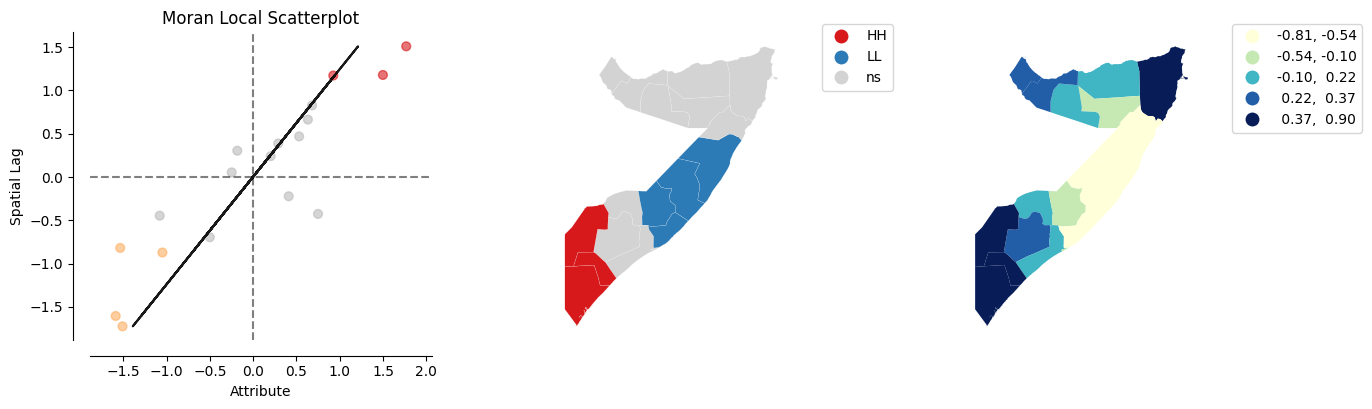

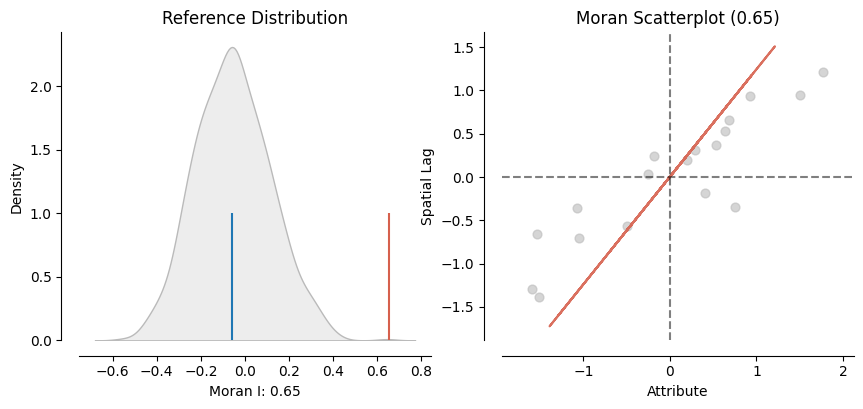

In [9]:
df['time'] = pd.to_datetime(df['time'])
conf_y=df.groupby('admin1')['TA'].mean()
conf_y=conf_y.reset_index()
conf_y['admin1'] = conf_y['admin1'].str.replace('_', ' ')

morans=[]
w = Queen.from_dataframe(states_gdf)

merged_data = states_gdf.merge(conf_y, left_on='ADM1_EN', right_on='admin1')
y = merged_data['TA'].values
moran = Moran(y, w)
morans.append(moran)
print('p-value:', moran.p_sim)
print('Moran I:', moran.I)

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
plot_local_autocorrelation(moran_loc, merged_data, 'TA')
plot_moran(moran)

#plt.savefig('Moran_Local_TA.pdf')
#plt.savefig('Moran_TA.pdf')

plt.show()

In [15]:
w
#show w matrix
w.transform = 'r'
print(w)



## PA

p-value: 0.001
Moran I: 0.5586042950612339


/home/sara/.local/lib/python3.8/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


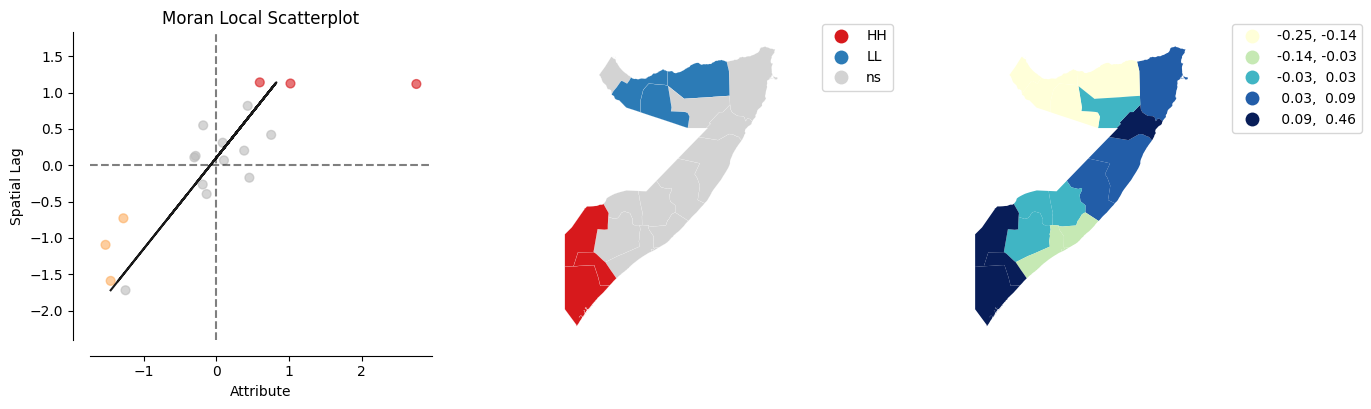

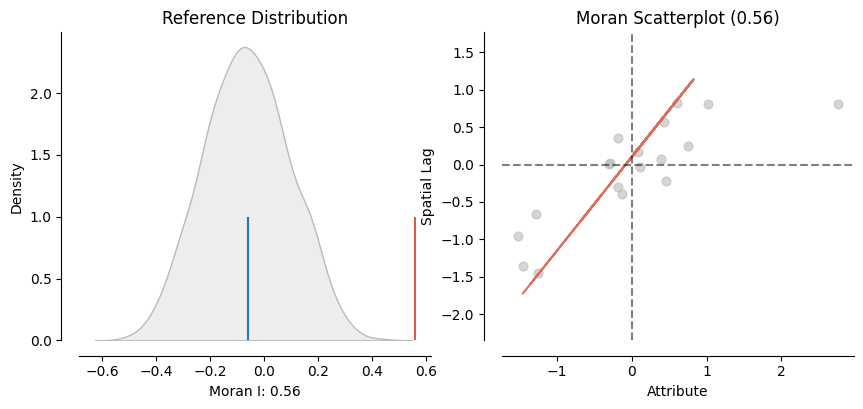

In [10]:
df['time'] = pd.to_datetime(df['time'])
conf_y=df.groupby('admin1')['PA'].mean()
conf_y=conf_y.reset_index()
conf_y['admin1'] = conf_y['admin1'].str.replace('_', ' ')

morans=[]
w = Queen.from_dataframe(states_gdf)

merged_data = states_gdf.merge(conf_y, left_on='ADM1_EN', right_on='admin1')
y = merged_data['PA'].values
moran = Moran(y, w)
morans.append(moran)
print('p-value:', moran.p_sim)
print('Moran I:', moran.I)

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
plot_local_autocorrelation(moran_loc, merged_data, 'PA')
plot_moran(moran)

#plt.savefig('Moran_Local_PA.pdf')
#plt.savefig('Moran_PA.pdf')

plt.show()

## DL

p-value: 0.001
Moran I: 0.5633087957927454


/home/sara/.local/lib/python3.8/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


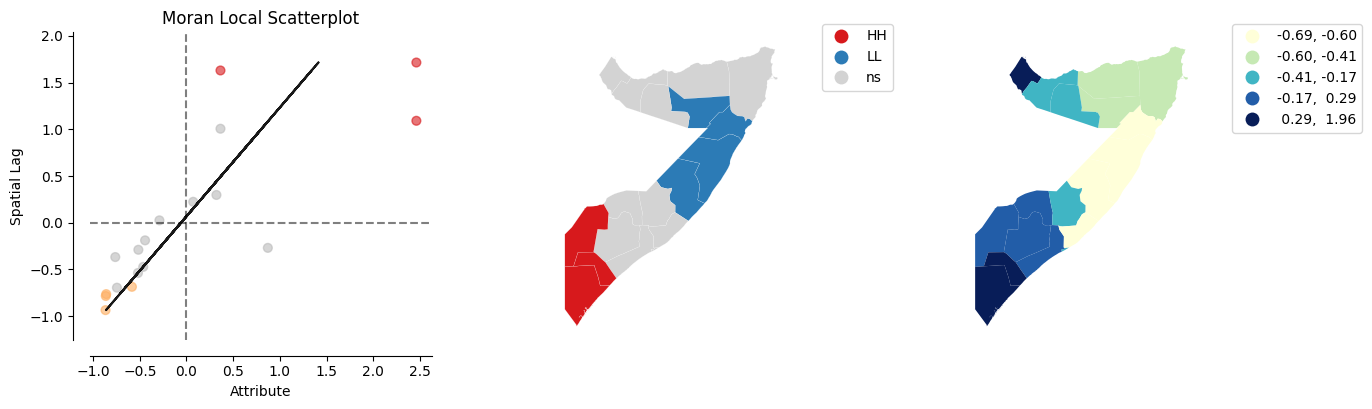

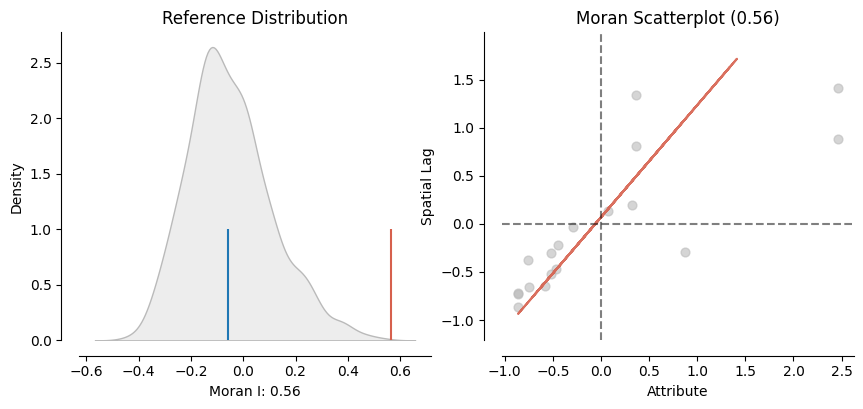

In [11]:
df['time'] = pd.to_datetime(df['time'])
conf_y=df.groupby('admin1')['DL'].mean()
conf_y=conf_y.reset_index()
conf_y['admin1'] = conf_y['admin1'].str.replace('_', ' ')

morans=[]
w = Queen.from_dataframe(states_gdf)

merged_data = states_gdf.merge(conf_y, left_on='ADM1_EN', right_on='admin1')
y = merged_data['DL'].values
moran = Moran(y, w)
morans.append(moran)
print('p-value:', moran.p_sim)
print('Moran I:', moran.I)

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
plot_local_autocorrelation(moran_loc, merged_data, 'DL')
plot_moran(moran)

#plt.savefig('Moran_Local_DL.pdf')
#plt.savefig('Moran_DL.pdf')

plt.show()

## by year

In [7]:
morans=[]
w = Queen.from_dataframe(states_gdf)

for date in conf_y.index.get_level_values(0).unique():
    c_year = conf_y.loc[date].reset_index()
    merged_data = states_gdf.merge(c_year, left_on='ADM1_EN', right_on='admin1')
    y = merged_data['TA'].values
    moran = Moran(y, w)
    morans.append(moran)
    print('Year:' , date.year)
    print('p-value:', moran.p_sim)
    print('Moran I:', moran.I)

    # calculate Moran_Local and plot
    moran_loc = Moran_Local(y, w)
    plot_local_autocorrelation(moran_loc, merged_data, 'TA')
    #store date.year, moran.I, moran.p_sim in a dictionary
    

    plt.show()

KeyError: 'admin1'